In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [58]:
# Read data from csv
insider_df = pd.read_csv("Resources/Insider_Trading_Cleaned.csv")
insider_df.head()

,Company,Filing Date,Trade Date,Ticker,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
0,0 Relic Inc.,03/09/2020 17:31,01/09/2020,0R,Cirne Lewis,CEO 10%,S - Sale,62.74,-35500,6202967,-1%,-2227184,61.730000,60.320000,61.529999,62.799999
1,0 Relic Inc.,02/10/2020 17:52,01/10/2020,0R,Cirne Lewis,CEO 10%,S - Sale,57.48,-34500,6168467,-1%,-1982897,56.029999,56.310001,57.150002,57.349998
2,0 Relic Inc.,04/11/2020 17:03,02/11/2020,0R,Cirne Lewis,CEO 10%,S - Sale,58.92,-35500,6132976,-1%,-2091741,63.330002,63.150002,60.959999,58.919998
3,0 Relic Inc.,10/11/2020 19:13,10/11/2020,0R,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0,260009,55.450001,53.730000,55.450001,53.730000
4,0 Relic Inc.,17/11/2020 18:13,16/11/2020,0R,Sachleben Mark,CFO,S - Sale+OE,56.00,-2351,371740,-1%,-131661,55.150002,56.450001,56.029999,54.790001


In [59]:
insider_df = insider_df.drop_duplicates()

In [56]:
insider_df.describe()

,Price,Quantity,Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
count,35441.000000,3.544100e+04,3.544100e+04,3.544100e+04,35441.000000,35441.000000,35441.000000,35441.000000
mean,148.597593,-7.621062e+04,5.869680e+06,-5.173418e+06,123.547910,123.548506,129.065983,129.311043
std,514.423546,1.747556e+06,6.638473e+07,5.402872e+07,179.681994,179.878579,179.103944,179.388862
min,0.000000,-1.328413e+08,0.000000e+00,-2.147484e+09,0.000000,0.000000,0.000000,0.000000
25%,35.000000,-1.800000e+04,1.765200e+04,-1.574949e+06,29.260000,29.200001,35.180000,35.270000
50%,79.630000,-5.000000e+03,6.162800e+04,-4.137000e+05,75.089996,75.260002,79.489998,79.820000
75%,155.000000,-1.114000e+03,2.606140e+05,-8.278300e+04,147.690002,147.309998,152.580002,152.850006
max,81700.600000,6.342412e+07,2.147484e+09,2.147484e+09,2664.810059,2623.949951,2573.479980,2635.159912


In [4]:
insider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 37709 non-null  object 
 1   Filing Date             37709 non-null  object 
 2   Trade Date              37709 non-null  object 
 3   Ticker                  37709 non-null  object 
 4   Insider Name            37709 non-null  object 
 5   Title                   37709 non-null  object 
 6   Transaction Type        37709 non-null  object 
 7   Price                   37709 non-null  float64
 8   Quantity                37709 non-null  int64  
 9   Owned                   37709 non-null  int64  
 10  Change of Amount Owned  37709 non-null  object 
 11  Value                   37709 non-null  int64  
 12  Date Filed Open         37709 non-null  float64
 13  Date Filed Close        37709 non-null  float64
 14  Date Traded Open        37709 non-null

In [118]:
insider_df.drop("Change of Amount Owned", axis=1, inplace=True)

In [119]:
insider_df["Change of Amount Owned"] = insider_df["Quatity"]/(insider_df["Owned"]- insider_df["Quatity"])
insider_df.head(10)

KeyError: 'Quatity'

In [117]:
nine_df

,Company,Filing Date,Trade Date,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close,Diff on File,Diff on Trading
1468,Advantage Solutions Inc.,22/03/2021 21:53,19/03/2021,Domier Tanya L,CEO,P - Purchase,11.07,27250,27280,>999,301658,10.920000,10.960000,10.850000,10.800000,0.003663,-0.004608
2238,Alliant Energy Corp,13/06/2022 10:56,09/06/2022,Falotico Nancy Joy,Dir,P - Purchase,61.00,1200,1210,>999,73200,58.660000,57.380001,60.990002,59.630001,-0.021821,-0.022299
2692,Alteryx Inc.,24/02/2022 21:07,22/02/2022,Horing Jeff,Dir,P - Purchase,54.79,911829,999911,>999,49962679,51.759998,57.520000,53.189999,54.880001,0.111283,0.031773
3247,American Software Inc,21/06/2022 09:21,17/06/2022,Thomas Lizanne,Dir,P - Purchase,15.56,1400,1488,>999,21784,15.960000,16.000000,15.560000,15.800000,0.002506,0.015424
4506,Ault Global Holdings Inc.,02/02/2021 18:22,21/12/2020,Ault Milton C III,Exec COB,P - Purchase,3.77,750,793,>999,2830,0.000000,0.000000,3.760000,3.690000,NaN,-0.018617
9162,Chipotle Mexican Grill Inc,27/04/2021 16:31,23/04/2021,Carey Matt,Dir,P - Purchase,1485.00,673,687,>999,999405,1479.260010,1468.869995,1482.000000,1468.530029,-0.007024,-0.009089
10234,Community Bank System Inc.,14/01/2022 17:14,07/01/2022,Knauss Jeffery J,Dir,P - Purchase,77.27,250,264,>999,19318,76.269997,77.750000,77.629997,77.220001,0.019405,-0.005281
13379,Echostar Corp,14/03/2022 16:39,10/03/2022,Dodge R Stanton,Dir,P - Purchase,24.17,20500,21011,>999,495485,24.250000,23.280001,24.020000,24.180000,-0.040000,0.006661
17889,Hca Healthcare Inc.,03/05/2022 17:59,29/04/2022,McAlevey Michael R,SVP GC,P - Purchase,218.56,1110,1136,>999,242602,210.589996,216.300003,216.610001,214.550003,0.027114,-0.009510
18009,Hepion Pharmaceuticals Inc.,30/11/2020 16:53,25/11/2020,Cavan John T,CFO,P - Purchase,1.62,4500,4800,>999,7290,1.700000,1.670000,1.580000,1.580000,-0.017647,0.000000


In [ ]:
insider_df["Change of Amount Owned"] = insider_df["Change of Amount Owned"].apply(np.int64)

In [5]:
insider_df["Company"].unique()

array(['0 Relic Inc.', '0 Residential Investment Corp.',
       '0ell Brands Inc.', ..., 'Zoom Video Communications Inc.',
       'Zscaler Inc.', 'Zynga Inc'], dtype=object)

In [60]:
insider_df = insider_df.drop("Ticker", axis=1)

In [61]:
insider_df.shape

(35441, 15)

# EDA

In [8]:
# Show the frequencies of each type of insider trades

insider_type = insider_df.groupby(["Title","Transaction Type"], as_index=False)["Value"].count()
insider_type = insider_type.rename(columns={"Value":"Trade Counts"})
insider_type = insider_type.sort_values(by="Trade Counts", ascending=False)
insider_type.head(10)

#len(insider_df["Title"].unique())


,Title,Transaction Type,Trade Counts
699,Dir,S - Sale,3913
698,Dir,P - Purchase,1963
700,Dir,S - Sale+OE,1750
155,CFO,S - Sale,851
10,10%,S - Sale,792
2042,Pres CEO,S - Sale,774
52,CEO,S - Sale,711
156,CFO,S - Sale+OE,703
2043,Pres CEO,S - Sale+OE,654
53,CEO,S - Sale+OE,506


In [9]:
# Purchase dataframe
insider_purchase = insider_type[insider_type["Transaction Type"]=="P - Purchase"]
insider_purchase.head()

,Title,Transaction Type,Trade Counts
698,Dir,P - Purchase,1963
9,10%,P - Purchase,413
2041,Pres CEO,P - Purchase,184
701,Dir 10%,P - Purchase,158
51,CEO,P - Purchase,119


In [10]:
# Sales dataframe
insider_sale = insider_type[(insider_type["Transaction Type"] == "S - Sale+OE")|(insider_type["Transaction Type"] == "S - Sale")]
insider_sale.head()

,Title,Transaction Type,Trade Counts
699,Dir,S - Sale,3913
700,Dir,S - Sale+OE,1750
155,CFO,S - Sale,851
10,10%,S - Sale,792
2042,Pres CEO,S - Sale,774


Text(0.5, 1.0, 'Top 10 purchases')

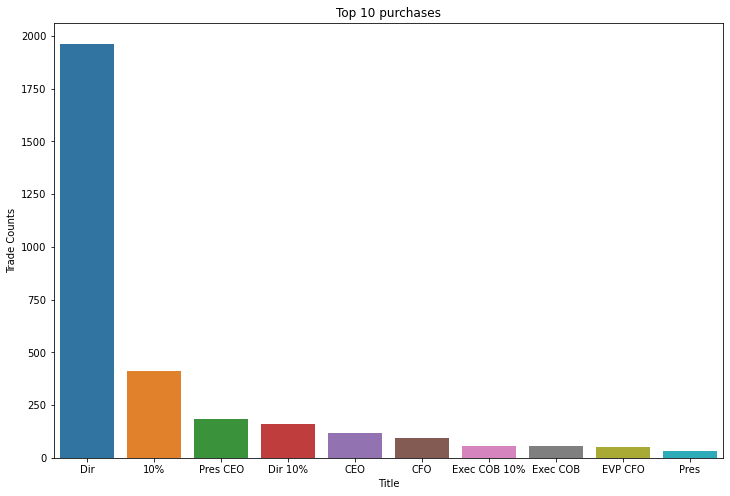

In [11]:
# Plot top 10 frequent buyers
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Title", y="Trade Counts", data=insider_purchase.sort_values(by="Trade Counts", ascending=False).head(10))
plt.title("Top 10 purchases")

Text(0.5, 1.0, 'Top 10 sell-offs')

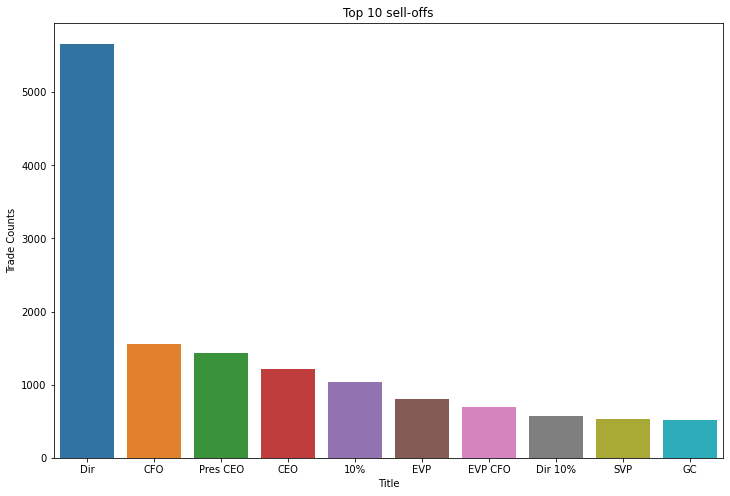

In [12]:
# Sales including "sale" and "sale+OE", grouping together
insider_sale = insider_sale.groupby("Title", as_index=False).sum("Trade Counts")

# Plot top 10 sellers
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Title", y="Trade Counts", data=insider_sale.sort_values(by="Trade Counts", ascending=False).head(10))
plt.title("Top 10 sell-offs")

In [25]:
# Determine insider counts

insider_counts = insider_df.groupby(["Insider Name", "Title", "Company","Transaction Type"], as_index=False)["Price"].count()
insider_counts = insider_counts.rename(columns={"Price" : "Count"})
insider_counts = insider_counts.sort_values(by="Count", ascending=False)


In [14]:
insider_counts.head(10)

,Insider Name,Title,Company,Transaction Type,Count
9036,Regan Timothy,CFO,Dropbox Inc.,S - Sale,136
5162,Istar Inc.,10%,Safehold Inc.,P - Purchase,90
11494,Volkmer Bart,GC,Dropbox Inc.,S - Sale,80
814,Benioff Marc,COB co-CEO,Salesforce Inc.,S - Sale+OE,72
6444,Lilly Endowment Inc,10%,Eli Lilly & Co,S - Sale,68
12255,Young Timothy H.,Pres,Dropbox Inc.,S - Sale,64
2696,Del Preto Joseph,CFO Treasurer,Sprout Social Inc.,S - Sale,56
721,Bcp Gp Ltd,Dir 10%,Graftech International Ltd,S - Sale,54
3811,Garcia Ernest C. II,10%,Carvana Co.,S - Sale+OE,54
10600,Steinert Langley,Exec COB 10%,Cargurus Inc.,S - Sale,52


In [33]:
# Which companies have the most sells and which companies have the most purchases by insiders (by transaction counts)?
comp_buy = insider_counts[insider_counts["Transaction Type"]=="P - Purchase"].groupby("Company", as_index=False)["Count"].sum()
comp_buy.head(10)

,Company,Count
0,0 Relic Inc.,1
1,0 Residential Investment Corp.,2
2,0ell Brands Inc.,4
3,0link Genetics Corp,9
4,0mark Group Inc.,5
5,0s Corp,2
6,2U Inc.,4
7,3D Systems Corp,5
8,8X8 Inc /de/,1
9,Aar Corp,3


[Text(0, 0, 'Consolidated Edison Inc'),
 Text(1, 0, 'Safehold Inc.'),
 Text(2, 0, 'Ault Global Holdings Inc.'),
 Text(3, 0, 'Simon Property Group Inc /de/'),
 Text(4, 0, 'Community Bancorp /vt'),
 Text(5, 0, 'Rgc Resources Inc'),
 Text(6, 0, 'Six Flags Entertainment Corp'),
 Text(7, 0, 'Net 1 Ueps Technologies Inc'),
 Text(8, 0, 'Great American Group Inc.'),
 Text(9, 0, 'Global Water Resources Inc.')]

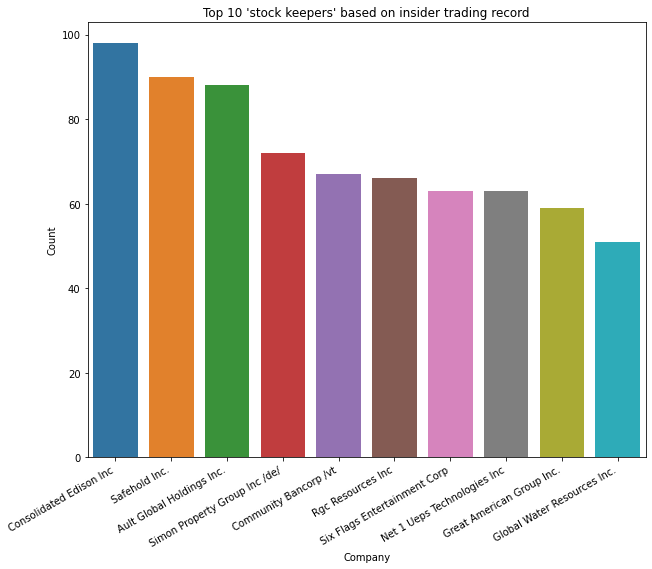

In [16]:
# Companies that have been bought the most
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Company", y="Count", data=comp_buy.sort_values(by="Count",ascending=False).head(10))
plt.title("Top 10 'stock keepers' based on insider trading record")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [26]:
# Companies that have been sold the most
comp_sale = insider_counts[(insider_counts["Transaction Type"]=="S - Sale")|(insider_counts["Transaction Type"]=="S - Sale+OE")]
comp_sale.head(10)

,Insider Name,Title,Company,Transaction Type,Count
9036,Regan Timothy,CFO,Dropbox Inc.,S - Sale,136
11494,Volkmer Bart,GC,Dropbox Inc.,S - Sale,80
814,Benioff Marc,COB co-CEO,Salesforce Inc.,S - Sale+OE,72
6444,Lilly Endowment Inc,10%,Eli Lilly & Co,S - Sale,68
12255,Young Timothy H.,Pres,Dropbox Inc.,S - Sale,64
2696,Del Preto Joseph,CFO Treasurer,Sprout Social Inc.,S - Sale,56
721,Bcp Gp Ltd,Dir 10%,Graftech International Ltd,S - Sale,54
3811,Garcia Ernest C. II,10%,Carvana Co.,S - Sale+OE,54
10600,Steinert Langley,Exec COB 10%,Cargurus Inc.,S - Sale,52
12092,Woltosz Walter S,Dir 10%,Simulations Plus Inc.,S - Sale,52


In [62]:
comp_sale = comp_sale.groupby("Company", as_index=False)["Count"].sum()
comp_sale.head()

,Company,Count
0,0 Relic Inc.,68
1,0ell Brands Inc.,2
2,0link Genetics Corp,5
3,0mark Group Inc.,1
4,0mont Corp /de/,200


[Text(0, 0, 'Dropbox Inc.'),
 Text(1, 0, 'Sprout Social Inc.'),
 Text(2, 0, '0mont Corp /de/'),
 Text(3, 0, 'Globe Life Inc.'),
 Text(4, 0, 'Alphabet Inc.'),
 Text(5, 0, 'Estee Lauder Companies Inc'),
 Text(6, 0, 'Best Buy Co Inc'),
 Text(7, 0, 'Advanced Micro Devices Inc'),
 Text(8, 0, 'Regeneron Pharmaceuticals Inc.'),
 Text(9, 0, 'Grocery Outlet Holding Corp.')]

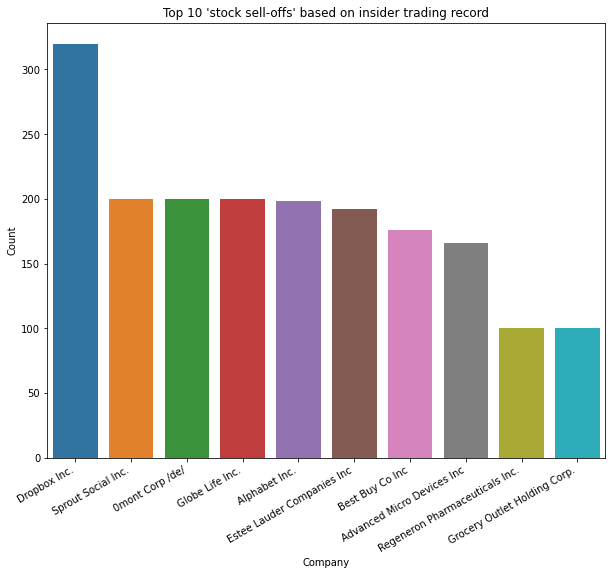

In [19]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Company", y="Count", data=comp_sale.sort_values(by="Count",ascending=False).head(10))
plt.title("Top 10 'stock sell-offs' based on insider trading record")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [41]:
# Insider counts for each company
count_df = insider_counts.drop_duplicates(subset=["Company", "Insider Name"])
count_df = count_df.groupby("Company", as_index=False)["Insider Name"].count()
count_df.head()

,Company,Insider Name
0,0 Relic Inc.,7
1,0 Residential Investment Corp.,2
2,0ell Brands Inc.,3
3,0link Genetics Corp,5
4,0mark Group Inc.,2


In [42]:
count_df = count_df.rename(columns={"Insider Name":"Number of insiders"})
count_df.head()

,Company,Number of insiders
0,0 Relic Inc.,7
1,0 Residential Investment Corp.,2
2,0ell Brands Inc.,3
3,0link Genetics Corp,5
4,0mark Group Inc.,2


In [43]:
purchase_df = pd.merge(count_df, comp_buy, on="Company", how="inner")
# Add in a column for purchase per insider
purchase_df["Purchase per insider"] = comp_buy["Count"]/count_df["Number of insiders"]
purchase_df=purchase_df.sort_values(by="Purchase per insider", ascending=False)
purchase_df.head(10)

,Company,Number of insiders,Count,Purchase per insider
590,Six Flags Entertainment Corp,9,63,63.000000
507,Pb Bankshares Inc.,7,26,26.000000
313,Global Water Resources Inc.,5,51,25.500000
67,Appian Corp,13,20,20.000000
444,Mge Energy Inc,6,17,17.000000
492,Old Republic International Corp,13,31,15.500000
644,Truist Financial Corp,19,14,14.000000
156,Capitala Finance Corp.,2,14,14.000000
193,Community Bancorp /vt,13,67,13.400000
562,Safehold Inc.,2,90,12.857143


In [63]:
sales_df = pd.merge(comp_sale, count_df, on="Company", how="inner")
sales_df["sale per insider"] = comp_sale["Count"]/count_df["Number of insiders"]
sales_df = sales_df.sort_values(by="sale per insider", ascending=False)


,Company,Count,Number of insiders,sale per insider
67,Alphabet Inc.,198,12,198.0
4,0mont Corp /de/,200,10,100.0
801,Pinterest Inc.,99,9,99.0
203,Boston Scientific Corp,91,19,91.0
438,First Solar Inc.,83,16,83.0


In [64]:
sales_df.head(10)

,Company,Count,Number of insiders,sale per insider
67,Alphabet Inc.,198,12,198.0
4,0mont Corp /de/,200,10,100.0
801,Pinterest Inc.,99,9,99.0
203,Boston Scientific Corp,91,19,91.0
438,First Solar Inc.,83,16,83.0
215,Broadcom Inc.,60,12,60.0
551,Insperity Inc.,60,9,60.0
1106,Zebra Technologies Corp,55,14,55.0
998,Travelers Companies Inc.,52,12,52.0
822,Procter & Gamble Co,100,21,50.0


In [87]:
# Impact insider tradings have on stock prices on trading days and file days
file = (insider_df["Date Filed Close"] - insider_df["Date Filed Open"])/insider_df["Date Filed Open"]
trade = (insider_df["Date Traded Close"] - insider_df["Date Traded Open"])/insider_df["Date Traded Open"]

# insider_impact = insider_df[["Diff on File", "Diff on Trading"]] = [file, trade] 

# insider_impact = insider_df.join(pd.DataFrame({"Diff on File": (insider_df["Date Filed Close"] - insider_df["Date Filed Open"])/insider_df["Date Filed Open"], 
#                                                "Diff on Trading" : (insider_df["Date Traded Close"] - insider_df["Date Traded Open"])/insider_df["Date Traded Open"]}))
# insider_impact.head()


In [85]:
insider_df["Diff on File"] =file
insider_df["Diff on Trading"] = trade

In [86]:
insider_df

,Company,Filing Date,Trade Date,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close,Diff on File,Diff on Trading
0,0 Relic Inc.,03/09/2020 17:31,01/09/2020,Cirne Lewis,CEO 10%,S - Sale,62.74,-35500,6202967,-1%,-2227184,61.730000,60.320000,61.529999,62.799999,-0.022841,0.020640
1,0 Relic Inc.,02/10/2020 17:52,01/10/2020,Cirne Lewis,CEO 10%,S - Sale,57.48,-34500,6168467,-1%,-1982897,56.029999,56.310001,57.150002,57.349998,0.004997,0.003499
2,0 Relic Inc.,04/11/2020 17:03,02/11/2020,Cirne Lewis,CEO 10%,S - Sale,58.92,-35500,6132976,-1%,-2091741,63.330002,63.150002,60.959999,58.919998,-0.002842,-0.033465
3,0 Relic Inc.,10/11/2020 19:13,10/11/2020,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0,260009,55.450001,53.730000,55.450001,53.730000,-0.031019,-0.031019
4,0 Relic Inc.,17/11/2020 18:13,16/11/2020,Sachleben Mark,CFO,S - Sale+OE,56.00,-2351,371740,-1%,-131661,55.150002,56.450001,56.029999,54.790001,0.023572,-0.022131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,Zynga Inc,19/10/2021 18:11,15/10/2021,Siminoff Ellen F,Dir,S - Sale,7.46,-5000,213930,-2%,-37300,0.000000,0.000000,267.000000,266.320007,NaN,-0.002547
37705,Zynga Inc,22/10/2021 16:30,21/10/2021,Griffin James Gerard,CFO,S - Sale,8.00,-52636,563273,-9%,-421088,0.000000,0.000000,273.640015,274.779999,NaN,0.004166
37706,Zynga Inc,17/11/2021 17:46,15/11/2021,Ryan Jeffrey Miles,Chief People Officer,S - Sale,7.46,-9463,12897,-42%,-70594,0.000000,0.000000,255.000000,263.709991,NaN,0.034157
37707,Zynga Inc,17/11/2021 17:47,15/11/2021,Siminoff Ellen F,Dir,S - Sale+OE,7.58,-5000,214477,-2%,-37900,0.000000,0.000000,255.000000,263.709991,NaN,0.034157


In [110]:
# For Change of Amount Owned equals to 0, we will drop and not be considered
insider2_df = insider_df.loc[insider_df["Change of Amount Owned"] != ]
insider2_df.head(10)

,Company,Filing Date,Trade Date,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close,Diff on File,Diff on Trading
0,0 Relic Inc.,03/09/2020 17:31,01/09/2020,Cirne Lewis,CEO 10%,S - Sale,62.74,-35500,6202967,-1%,-2227184,61.730000,60.320000,61.529999,62.799999,-0.022841,0.020640
1,0 Relic Inc.,02/10/2020 17:52,01/10/2020,Cirne Lewis,CEO 10%,S - Sale,57.48,-34500,6168467,-1%,-1982897,56.029999,56.310001,57.150002,57.349998,0.004997,0.003499
2,0 Relic Inc.,04/11/2020 17:03,02/11/2020,Cirne Lewis,CEO 10%,S - Sale,58.92,-35500,6132976,-1%,-2091741,63.330002,63.150002,60.959999,58.919998,-0.002842,-0.033465
3,0 Relic Inc.,10/11/2020 19:13,10/11/2020,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0,260009,55.450001,53.730000,55.450001,53.730000,-0.031019,-0.031019
4,0 Relic Inc.,17/11/2020 18:13,16/11/2020,Sachleben Mark,CFO,S - Sale+OE,56.00,-2351,371740,-1%,-131661,55.150002,56.450001,56.029999,54.790001,0.023572,-0.022131
5,0 Relic Inc.,03/12/2020 17:14,01/12/2020,Cirne Lewis,CEO 10%,S - Sale,59.63,-35000,6057976,-1%,-2087050,60.400002,61.619999,59.720001,60.160000,0.020199,0.007368
6,0 Relic Inc.,06/01/2021 17:44,04/01/2021,Cirne Lewis,CEO 10%,S - Sale,63.32,-39500,6018476,-1%,-2501039,62.549999,62.180000,65.150002,63.000000,-0.005915,-0.033001
7,0 Relic Inc.,17/02/2021 17:05,15/02/2021,Staples William,Pres CPO,S - Sale+OE,64.58,-3894,9165,-30%,-251479,63.270000,63.880001,0.000000,0.000000,0.009641,NaN
8,0 Relic Inc.,17/02/2021 17:03,16/02/2021,Sachleben Mark,CFO,S - Sale+OE,64.58,-1709,375267,0%,-110365,63.270000,63.880001,65.000000,63.520000,0.009641,-0.022769
9,0 Relic Inc.,18/02/2021 17:15,16/02/2021,Cirne Lewis,CEO 10%,S - Sale+OE,63.28,-42000,6006476,-1%,-2657644,62.400002,64.300003,65.000000,63.520000,0.030449,-0.022769


In [97]:
diff_trading = insider_df[["Company", "Trade Date", "Title", "Change of Amount Owned", "Transaction Type", "Diff on Trading"]].sort_values(by="Diff on Trading", ascending=False)[0:10]

In [98]:
diff_trading

,Company,Trade Date,Title,Change of Amount Owned,Transaction Type,Diff on Trading
35656,Vir Biotechnology Inc.,26/01/2021,EVP Research CSO,-49%,S - Sale+OE,0.719555
26461,Petmed Express Inc,02/06/2021,CFO Treasurer,-16%,S - Sale,0.576318
16206,Gamestop Corp.,13/01/2021,Dir,-8%,S - Sale,0.537708
16208,Gamestop Corp.,13/01/2021,Dir,-39%,S - Sale,0.537708
16207,Gamestop Corp.,13/01/2021,Dir,-51%,S - Sale,0.537708
23569,Monmouth Real Estate Investment Corp,15/12/2020,Controller,1%,P - Purchase,0.509091
23571,Monmouth Real Estate Investment Corp,15/12/2020,Pres CEO,0%,P - Purchase,0.509091
23570,Monmouth Real Estate Investment Corp,15/12/2020,CFO,0%,P - Purchase,0.509091
6166,Biogen Inc.,04/11/2020,EVP Research Development,-10%,S - Sale,0.404542
14942,Everspin Technologies Inc,12/11/2021,Former 10% Holder,-22%,S - Sale,0.349246


Text(0.5, 1.0, 'Top 10 insider trades impact on trading day')

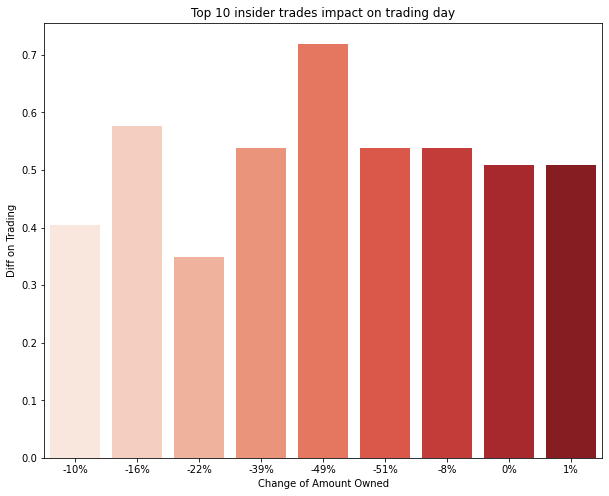

In [107]:
plt.figure(figsize=(10,8))
sns.barplot(y="Diff on Trading", x="Change of Amount Owned", data=diff_trading.sort_values("Change of Amount Owned"), palette="Reds")
plt.title("Top 10 insider trades impact on trading day")

In [99]:
diff_file = insider_df[["Company", "Filing Date", "Title", "Change of Amount Owned", "Transaction Type", "Diff on File"]].sort_values(by="Diff on File", ascending=False)[0:10]

In [100]:
diff_file

,Company,Filing Date,Title,Change of Amount Owned,Transaction Type,Diff on File
33430,Therealreal Inc.,24/02/2022 14:54,Chief Product Technology O,-19%,S - Sale,0.345238
33431,Therealreal Inc.,24/02/2022 14:55,Pres,-2%,S - Sale,0.345238
6169,Biogen Inc.,07/06/2021 19:02,Dir,-5%,S - Sale,0.340274
34043,Trovagene Inc.,17/09/2020 09:42,Dir,1%,P - Purchase,0.327332
19249,Intevac Inc,31/03/2021 19:42,EVP GM,-9%,S - Sale+OE,0.304745
16212,Gamestop Corp.,22/03/2022 18:16,Dir 10%,1%,P - Purchase,0.290776
13848,Energous Corp,23/12/2020 20:46,Dir,-40%,S - Sale,0.270000
19597,Irobot Corp,27/01/2021 18:45,Dir,-23%,S - Sale,0.249302
13444,Editas Medicine Inc.,30/06/2021 16:11,CFO,-8%,S - Sale+OE,0.247577
16290,Garrett Motion Inc.,23/10/2020 18:27,Member of 10% owner group,11%,P - Purchase,0.233962
